In [77]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP.models import ModelSpec as MS
from ISLP.models import Stepwise, sklearn_selected
from sklearn.pipeline import Pipeline

from functools import partial

import warnings

### (a)

In [78]:
np.random.seed(42)
X = np.random.normal(size=100)
Noise = np.random.normal(size=100)

In [79]:
X, Noise

(array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
        -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
        -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
        -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
         1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
         0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
        -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
        -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
         0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
        -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
         0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
         0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
        -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
         1.35624003, -0.07201012,  1.0035329 ,  0.3

### (b)

In [80]:
b0, b1, b2, b3 = np.random.random(size=4)

y = Noise + b0 + b1*X + b2*(X**2) + b3*(X**3)

In [81]:
y

array([ 8.80144312e-02,  3.65773949e-01,  1.49771319e+00,  5.30189134e+00,
        5.71831159e-01,  1.13717643e+00,  8.43836402e+00,  2.34846660e+00,
        8.68088575e-01,  1.52221677e+00, -1.30490756e+00,  5.86082797e-01,
        1.16759993e+00, -4.45239152e-01, -2.12419564e+00,  8.57883569e-01,
        7.75317675e-02,  3.21106058e-02,  1.39632424e+00, -5.50136516e-03,
        6.46308945e+00, -1.71816889e-01,  2.33358491e+00, -2.19666838e+00,
        1.15419972e+00,  3.15953136e+00, -1.11354841e+00,  7.25016029e-01,
        6.31328667e-01,  1.99690760e-01, -1.01969562e+00,  9.17377895e+00,
       -1.94803711e-01,  5.15973366e-01,  1.42979602e+00,  1.28356590e+00,
        2.85646651e-01, -3.50630512e+00,  2.90664917e-01, -1.75290818e-01,
        2.31486893e+00,  2.33546471e+00, -8.07543087e-01,  8.82975424e-01,
       -7.04782764e-01,  1.22510394e+00, -6.21568193e-01,  1.94879357e+00,
        1.76465673e+00, -1.81477210e+00,  1.46505664e+00,  1.00180963e+00,
       -2.02602870e-01,  

### (c)

In [82]:
X_10 = pd.DataFrame({
    'X': X,
    'X2': X**2,
    'X3': X**3,
    'X4': X**4,
    'X5': X**5,
    'X6': X**6,
    'X7': X**7,
    'X8': X**8,
    'X9': X**9,
    'X10': X**10,
})

X_10

,X,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,0.496714,0.246725,1.225518e-01,6.087320e-02,3.023658e-02,1.501894e-02,7.460119e-03,3.705547e-03,1.840597e-03,9.142508e-04
1,-0.138264,0.019117,-2.643201e-03,3.654603e-04,-5.053012e-05,6.986511e-06,-9.659851e-07,1.335613e-07,-1.846675e-08,2.553293e-09
2,0.647689,0.419500,2.717056e-01,1.759806e-01,1.139806e-01,7.382395e-02,4.781493e-02,3.096918e-02,2.005838e-02,1.299158e-02
3,1.523030,2.319620,3.532850e+00,5.380637e+00,8.194870e+00,1.248103e+01,1.900898e+01,2.895125e+01,4.409362e+01,6.715590e+01
4,-0.234153,0.054828,-1.283812e-02,3.006088e-03,-7.038856e-04,1.648172e-04,-3.859250e-05,9.036565e-06,-2.115942e-06,4.954550e-07
...,...,...,...,...,...,...,...,...,...,...
95,-1.463515,2.141876,-3.134668e+00,4.587633e+00,-6.714069e+00,9.826141e+00,-1.438070e+01,2.104637e+01,-3.080168e+01,4.507873e+01
96,0.296120,0.087687,2.596596e-02,7.689048e-03,2.276883e-03,6.742313e-04,1.996535e-04,5.912146e-05,1.750706e-05,5.184197e-06
97,0.261055,0.068150,1.779088e-02,4.644403e-03,1.212446e-03,3.165154e-04,8.262801e-05,2.157048e-05,5.631087e-06,1.470025e-06
98,0.005113,0.000026,1.337038e-07,6.836886e-10,3.496012e-12,1.787670e-14,9.141175e-17,4.674300e-19,2.390183e-21,1.222210e-23


In [83]:
def nCp(sigma2, estimator, X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n 

In [84]:
design = MS(X_10).fit(X_10)
X_10_scaled = design.transform(X_10)
sigma2 = OLS(y, X_10_scaled).fit().scale
sigma2

0.8737538686644166

In [85]:
neg_Cp = partial(nCp, sigma2)

In [86]:
strategy = Stepwise.first_peak(design, direction="forward", max_terms=len(design.terms))
X_10_Cp = sklearn_selected(OLS, strategy, scoring=neg_Cp)
X_10_Cp.fit(X_10, y)

#### What is the model obtained according to Cp?

In [87]:
X_10_Cp.selected_state_

('X', 'X2', 'X3')

#### Report the coefficients of the model obtained.

In [88]:
X_10_Cp.model_.fit().params

intercept    0.725300
X            0.605061
X2           0.903953
X3           0.730851
dtype: float64

### (d)

In [89]:
strategy_backward = Stepwise.first_peak(design, direction="backwards", max_terms=len(design.terms))
X_10_Cp_back = sklearn_selected(OLS, strategy_backward, scoring=neg_Cp)
X_10_Cp_back.fit(X_10, y)
X_10_Cp_back.selected_state_

('X', 'X2', 'X3')

### (e)

In [90]:
K = 5


kfold = skm.KFold(K, random_state=0, shuffle=True)
scaler = StandardScaler(with_mean=True,  with_std=True)
lassoCV = skl.ElasticNetCV(n_alphas=100, l1_ratio=1, cv=kfold)
pipeCV = Pipeline(steps=[("scaler", scaler), ("lasso", lassoCV)])
warnings.filterwarnings(action="ignore")
pipeCV.fit(X_10, y)
warnings.filterwarnings(action="default")
tuned_lasso = pipeCV.named_steps["lasso"]
tuned_lasso.alpha_

0.014910223480628461

<>:8: DeprecationWarning: invalid escape sequence '\l'
<>:8: DeprecationWarning: invalid escape sequence '\l'
C:\Users\User\AppData\Local\Temp\ipykernel_18396\2701897966.py:8: DeprecationWarning: invalid escape sequence '\l'
  ax.set_xlabel("$-\log(\lambda)$", fontsize=20)


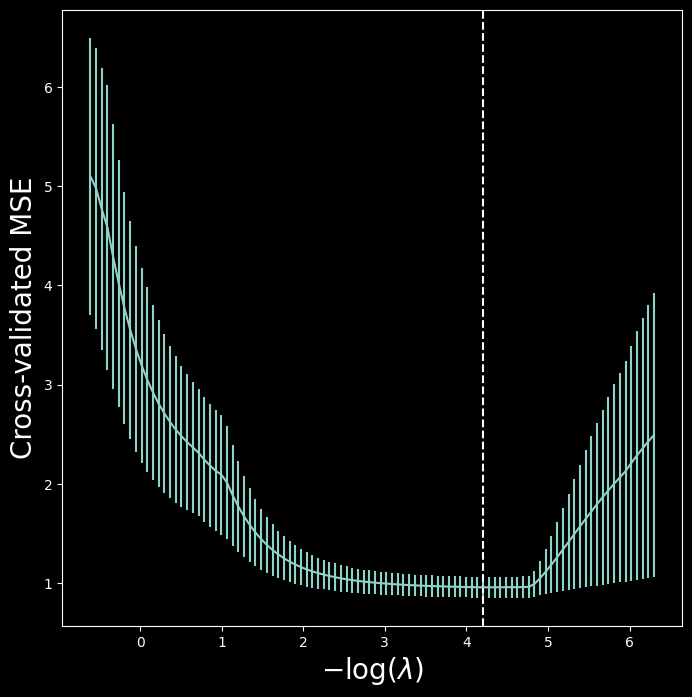

In [91]:
lassoCV_fig, ax = subplots(figsize=(8, 8))
ax.errorbar(
    -np.log(tuned_lasso.alphas_),
    tuned_lasso.mse_path_.mean(1),
    yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K),
)
ax.axvline(-np.log(tuned_lasso.alpha_), c="w", ls="--")
ax.set_xlabel("$-\log(\lambda)$", fontsize=20)
ax.set_ylabel("Cross-validated MSE", fontsize=20);

As expected, best alpha is 0.014910223480628461 (tuned_lasso.alpha_)

We wrawing vertical line at this point - lowest MSE

np.log(0.014910223480628461) = -4.205708161677412



### (f)

In [92]:
b7 = np.random.random()
y = Noise + b0 + b7*(X**7)
sigma2_2 = OLS(y, X_10_scaled).fit().scale
neg_Cp = partial(nCp, sigma2_2)
strategy = Stepwise.first_peak(design, direction="forward", max_terms=len(design.terms))
X_10_Cp = sklearn_selected(OLS, strategy, scoring=neg_Cp)
X_10_Cp.fit(X_10, y)
X_10_Cp_back.selected_state_

('X', 'X2', 'X3')

### forward stepwise selection yields the same predictors (result above)

In [93]:
warnings.filterwarnings(action="ignore")
pipeCV.fit(X_10, y)
warnings.filterwarnings(action="default")
tuned_lasso = pipeCV.named_steps["lasso"]
tuned_lasso.alpha_

0.08547105151590131

#### alpha changed

Text(0, 0.5, 'Cross-validated MSE')

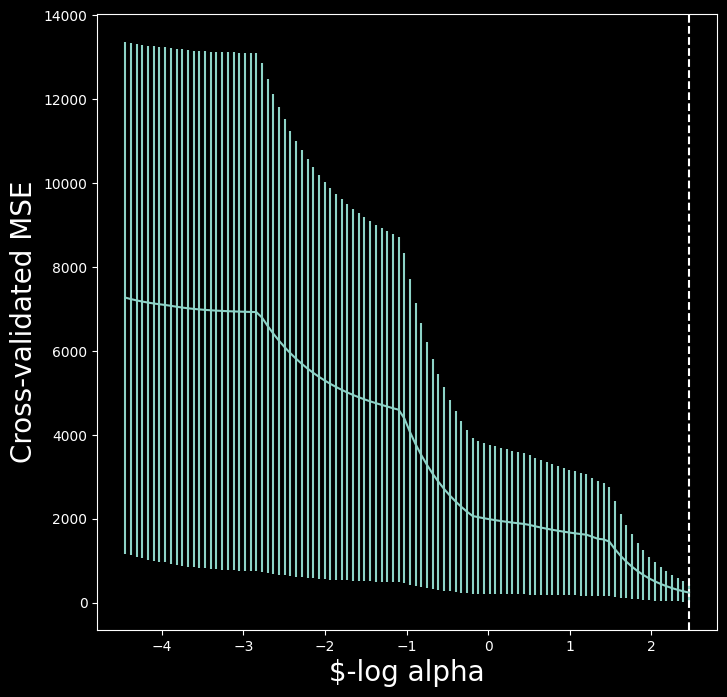

In [94]:
lassoCV_fig, ax = subplots(figsize=(8, 8))
ax.errorbar(
    -np.log(tuned_lasso.alphas_),
    tuned_lasso.mse_path_.mean(1),
    yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K),
)
ax.axvline(-np.log(tuned_lasso.alpha_), c="w", ls="--")
ax.set_xlabel("$-log alpha", fontsize=20)
ax.set_ylabel("Cross-validated MSE", fontsize=20)